In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
btc=yf.download("BTC-USD",start="2018-01-01")
n=1000
btc.index = pd.to_datetime(btc.index)
saturdays = btc[btc.index.weekday == 5] #sat
wednesdays = btc[btc.index.weekday == 2] #wed
trades = []
portfolio_values = []
portfolio_value = n

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
#min_length = min(len(saturdays), len(wednesdays))
#for i in range(min_length):
#    saturday_price = saturdays.iloc[i]['Close']
#    wednesday_price = wednesdays.iloc[i]['Close']

for i in range(len(saturdays)):
    saturday_date = saturdays.index[i]
    
    # Find the closest Wednesday after the Saturday
    wednesday_data = wednesdays[wednesdays.index >= saturday_date]
    if len(wednesday_data) > 0:
        wednesday_date = wednesday_data.index[0]
        
        saturday_price = saturdays.loc[saturday_date, 'Open']
        wednesday_price = wednesday_data.loc[wednesday_date, 'Close']

    btc_bought = portfolio_value / saturday_price
    portfolio_value = btc_bought * wednesday_price
    portfolio_values.append(portfolio_value)
    trades.append((saturday_date, portfolio_value))

print(f"Number of trades: {len(portfolio_values)}")
if len(portfolio_values) == 0:
    print("No trades were made. Check if Saturdays and Wednesdays are correctly aligned.")

portfolio_df = pd.DataFrame(trades, columns=["Date", "Portfolio Value"])
portfolio_df.set_index("Date", inplace=True)

Number of trades: 375


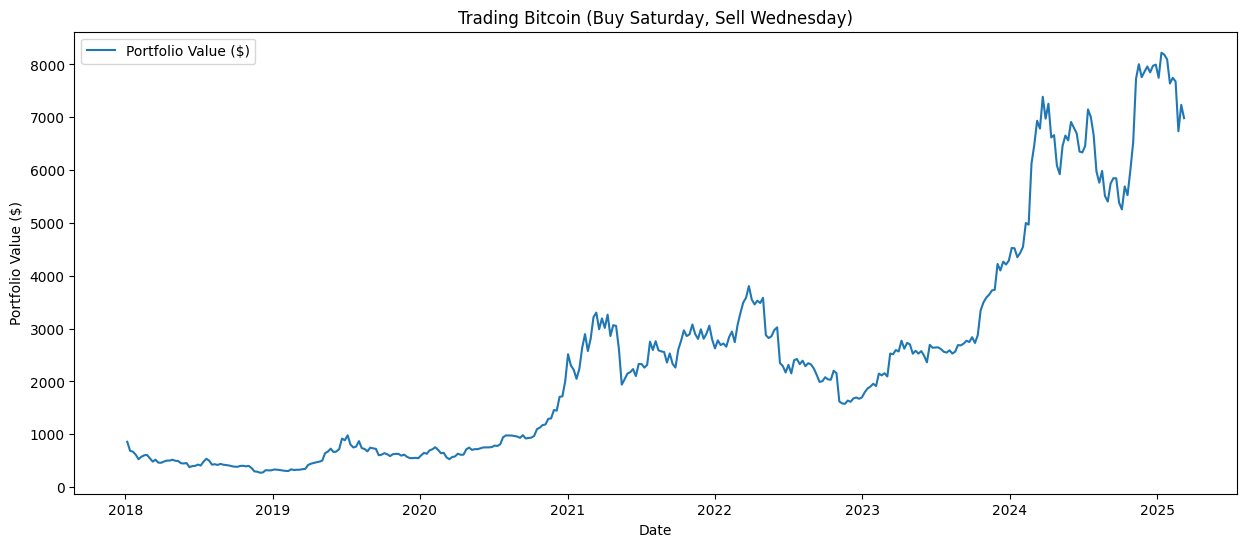

min closing price: Ticker
BTC-USD    3236.761719
dtype: float64
max closing price: Ticker
BTC-USD    106146.265625
dtype: float64
min openning price: Ticker
BTC-USD    3236.274658
dtype: float64
max openning price: Ticker
BTC-USD    106147.296875
dtype: float64
Final portfolio value: $Ticker
BTC-USD    6983.211625
dtype: float64


In [10]:
# Plot the portfolio value over time
plt.figure(figsize=(15, 6))
plt.plot(portfolio_df.index, portfolio_df["Portfolio Value"], label="Portfolio Value ($)")

plt.title("Trading Bitcoin (Buy Saturday, Sell Wednesday)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.show()

min_close=btc.Close.min()
max_close=btc.Close.max()
print(f"min closing price: {min_close}")
print(f"max closing price: {max_close}")
min_open=btc.Open.min()
max_open=btc.Open.max()
print(f"min openning price: {min_open}")
print(f"max openning price: {max_open}")
print(f"Final portfolio value: ${portfolio_value}")

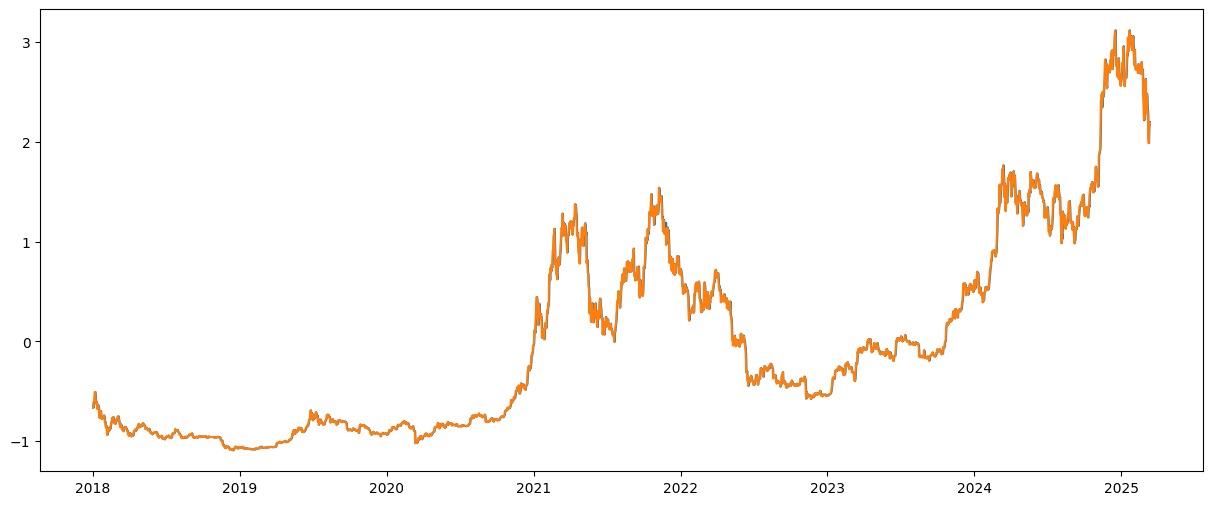

In [9]:
plt.figure(figsize=(15, 6))
btc_mean=btc.Open.mean()
btc_std=btc.Open.std()
btc_open_new=(btc.Open - btc_mean)/btc_std

plt.plot(btc_open_new)
btc_mean=btc.Close.mean()
btc_std=btc.Close.std()
btc_close_new=(btc.Close - btc_mean)/btc_std
plt.plot(btc_close_new)